# **PCA**

# Import

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
import sklearn.decomposition as skd
from sklearn.datasets import load_iris

# Analyse descriptive univariée

In [7]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Nous avons un ensemble de données avec 5 colonnes et 149 lignes:



*  -4 variables quantitatives (sepal_length, sepal_width, petal_length,petal_width)
*   Une variable qualitative (species)


Il n'y a aucune valeur nulle.

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.describe(include = 'object')

,species
count,150
unique,3
top,setosa
freq,50


<Axes: >

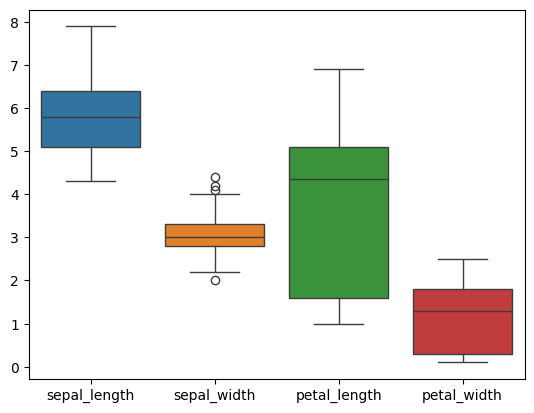

In [13]:
sns.boxplot(data = df)

Il y a des outliers au niveau de sepal_width.

ShapiroResult(statistic=0.9760902723490532, pvalue=0.010181161454691156)
La variable sepal_length n'est pas normally distributed
ShapiroResult(statistic=0.9849178695056319, pvalue=0.10115426916130282)
La variable sepal_width est normally distributed
ShapiroResult(statistic=0.8762680554631075, pvalue=7.412263135173186e-10)
La variable petal_length n'est pas normally distributed
ShapiroResult(statistic=0.9018349381915991, pvalue=1.680465210314913e-08)
La variable petal_width n'est pas normally distributed


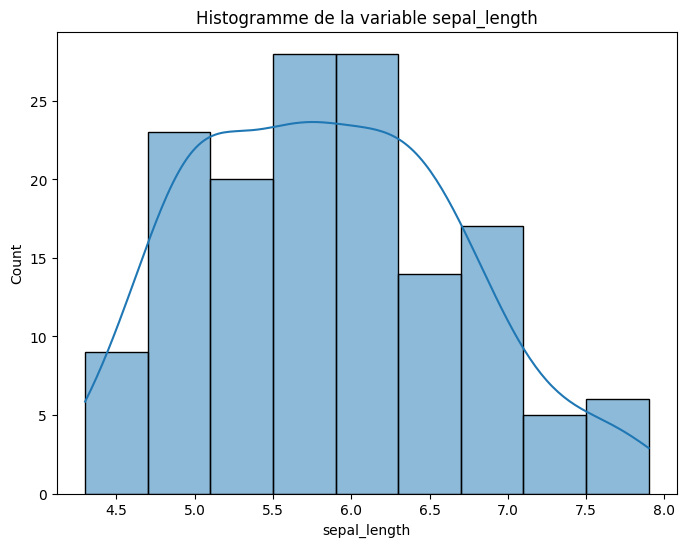

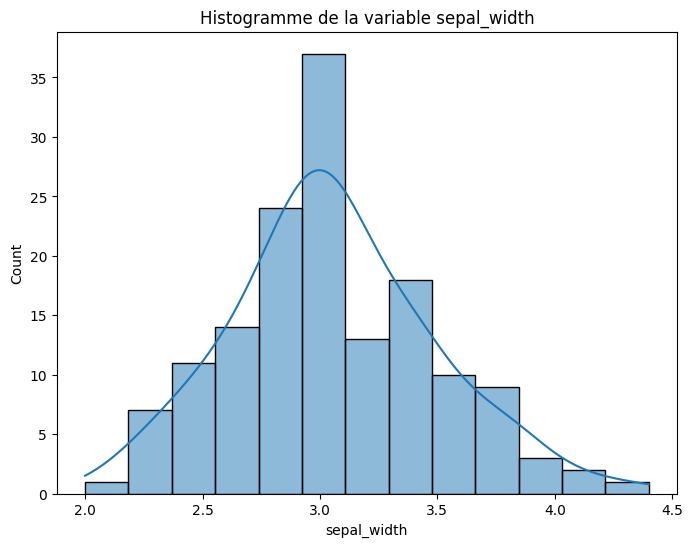

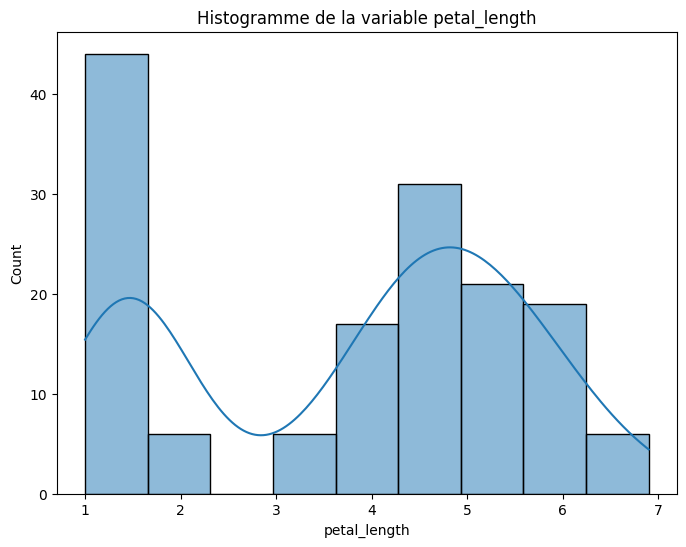

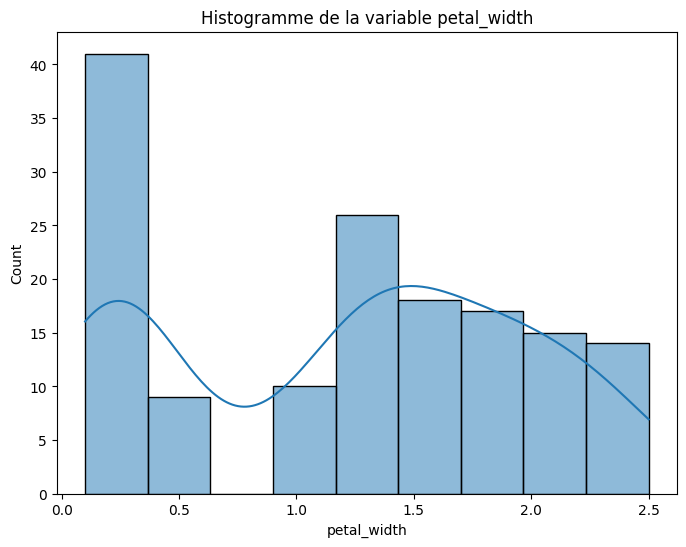

In [24]:
# Analyse de normalité
for col in df.columns[:-1]:
  plt.figure(figsize = (8, 6))
  sns.histplot(data = df, x = col, kde = True)
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  plt.title(f'Histogramme de la variable {col}')
  print(st.shapiro(df[col]))
  if st.shapiro(df[col])[1] < 0.05:
    print(f'La variable {col} n\'est pas normally distributed')
  else:
    print(f'La variable {col} est normally distributed')

<Axes: xlabel='species', ylabel='count'>

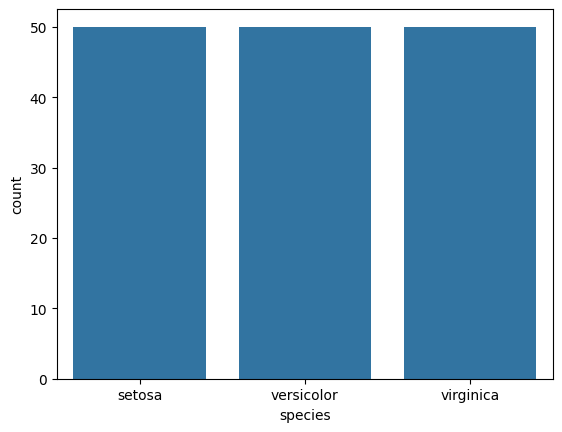

In [25]:
sns.countplot(x = df["species"])

([<matplotlib.patches.Wedge at 0x7a554fbbcfd0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')])

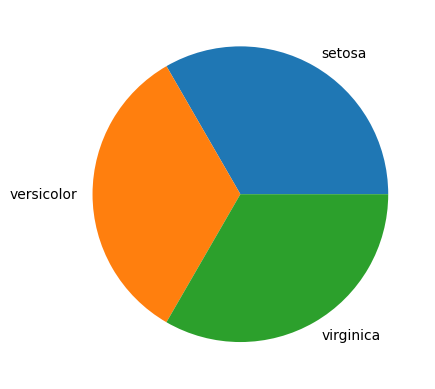

In [27]:
plt.pie(x = df['species'].value_counts(), labels = df['species'].value_counts().index)

# Analyse bivariée

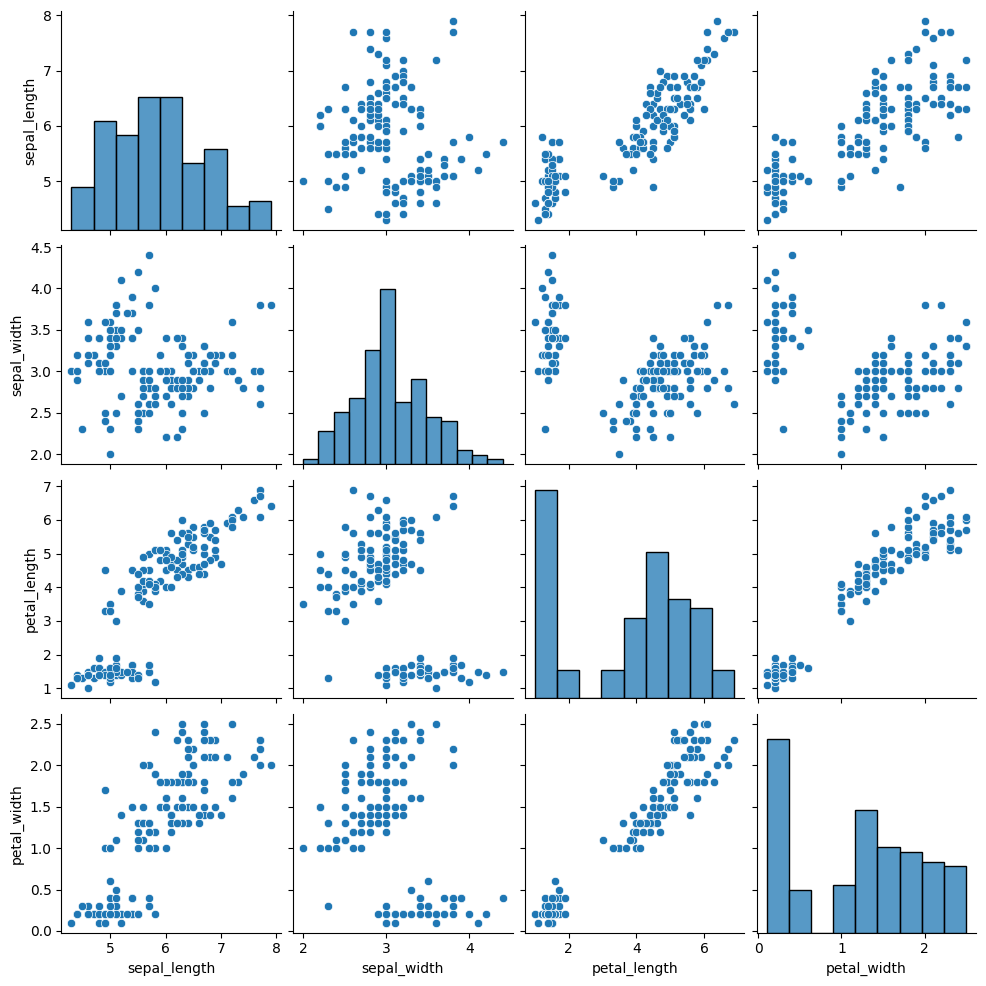

In [29]:
sns.pairplot(df)

<Axes: >

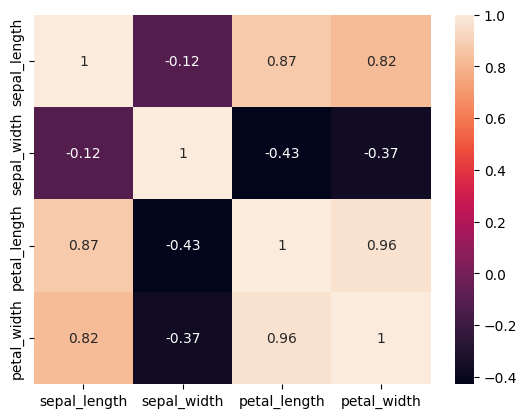

In [35]:
X = df.drop('species', axis = 1)
corr = X.corr()
sns.heatmap(corr, annot = True)

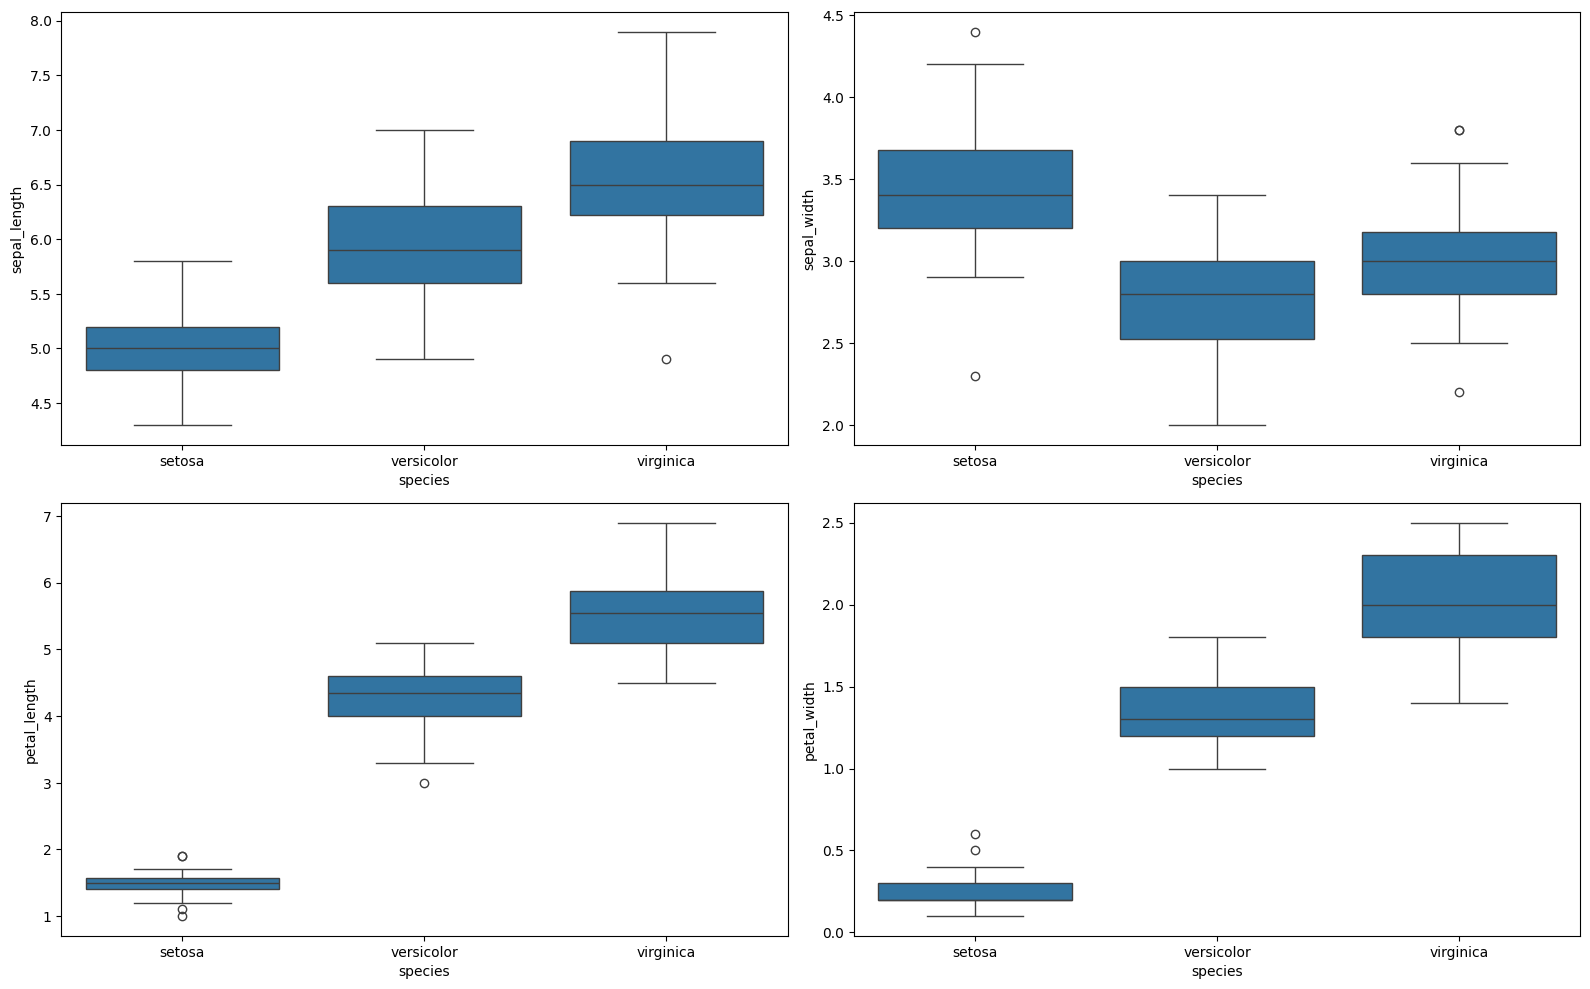

In [37]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['species'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()

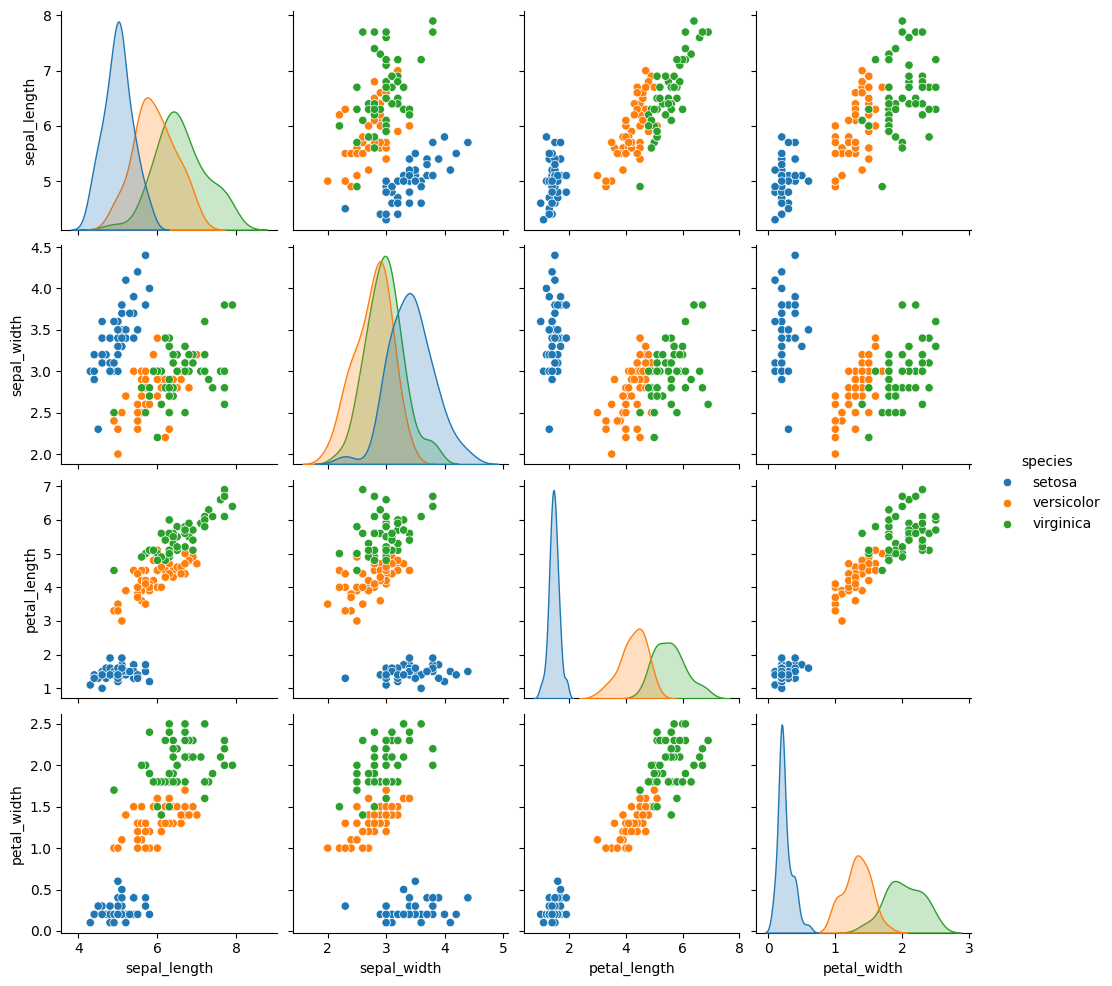

In [38]:
sns.pairplot(df, hue = "species")

In [40]:
for column in df.columns[:-1]:
    _, p_value = st.kruskal(*[df[column][df.species == species] for species in df.species.unique()])
    if p_value < 0.05:
        print(f"La variable {column} est significativement différente entre les espèces (p-value={p_value})")
    else:
        print(f"La variable {column} n'est pas significativement différente entre les espèces (p-value={p_value})")

La variable sepal_length est significativement différente entre les espèces (p-value=8.91873433246198e-22)
La variable sepal_width est significativement différente entre les espèces (p-value=1.5692820940316782e-14)
La variable petal_length est significativement différente entre les espèces (p-value=4.803973591157605e-29)
La variable petal_width est significativement différente entre les espèces (p-value=3.261795552421968e-29)


# Analyse multivariée avec l'ACP

In [51]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [59]:
# Standardisation des données
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
# Réduction de dimension
pca = skd.PCA()
x_pca = pca.fit_transform(X)

In [63]:
# Analyse des valeurs propres
tab = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)],
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
tab

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4.228242,92.0,92.0
1,Dim2,0.242671,5.0,98.0
2,Dim3,0.078210,2.0,99.0
3,Dim4,0.023835,1.0,100.0


<ipython-input-77-bf603fe0862e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_tab = sns.barplot(x = "Dimension",
<ipython-input-77-bf603fe0862e>:2: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g_tab = sns.barplot(x = "Dimension",


Text(3.25, 26, '25%')

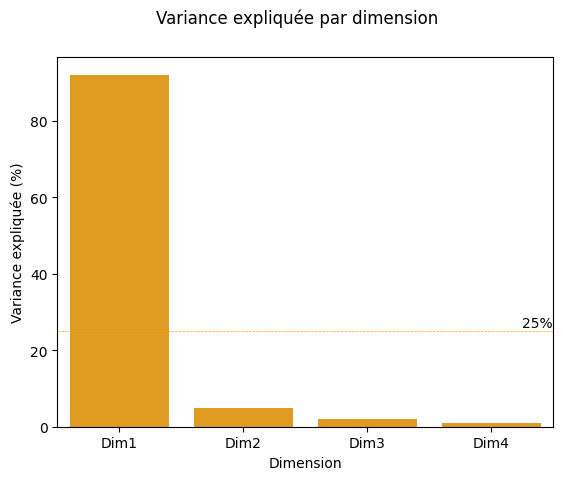

In [77]:
# Scree plot pour choisir le nombre de composantes principales
g_tab = sns.barplot(x = "Dimension",
                y = "% variance expliquée",
                palette = ["orange"],
                data = tab)
g_tab.set(ylabel = "Variance expliquée (%)")
g_tab.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "orange", linestyle = "--")
plt.text(3.25, 26, "25%")

In [67]:
# Calcul du cosinus carré des variables
cosin = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos = pd.DataFrame(cosin, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos.index = df.columns[:-1]

df_cos

,PC1,PC2,PC3,PC4
sepal_length,0.130600,0.007144,0.733885,0.128371
sepal_width,0.431109,0.533136,0.030058,0.005697
petal_length,0.338759,0.357497,0.005812,0.297932
petal_width,0.099532,0.102223,0.230245,0.568000


In [78]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
feature_names=df.columns[0:4]

# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

variable_contrib_df

,PC1_contrib,PC2_contrib,PC3_contrib,PC4_contrib
sepal_length,0.552210,0.104617,0.026494,0.002372
sepal_width,0.030207,0.129376,0.027960,0.002436
petal_length,3.103041,0.007294,0.000455,0.005488
petal_width,0.542784,0.001383,0.023301,0.013538


In [71]:
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Convertir les contributions en pourcentage
variable_contrib_percent = variable_contributions / eigenvalues * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

variable_contrib_df

,PC1_contrib,PC2_contrib,PC3_contrib,PC4_contrib
sepal_length,13.060027,43.110881,33.875875,9.953217
sepal_width,0.714406,53.313572,35.749736,10.222286
petal_length,73.388453,3.005808,0.581194,23.024545
petal_width,12.837115,0.569738,29.793195,56.799951


In [75]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (x_pca**2) / (x_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

contrib_df

,PC1_contrib,PC2_contrib,PC3_contrib,PC4_contrib
0,1.135938,0.280255,0.006642,0.000143
1,1.161486,0.086068,0.377577,0.274281
2,1.315955,0.057720,0.002731,0.011153
3,1.188344,0.278331,0.008490,0.159756
4,1.173994,0.293315,0.069167,0.104961
...,...,...,...,...
145,0.595923,0.096615,0.269548,5.080547
146,0.367724,0.386979,0.126661,1.809735
147,0.490813,0.017084,0.145127,0.524978
148,0.569753,0.037368,4.458903,0.055625


# Représentation  graphique et interpretation

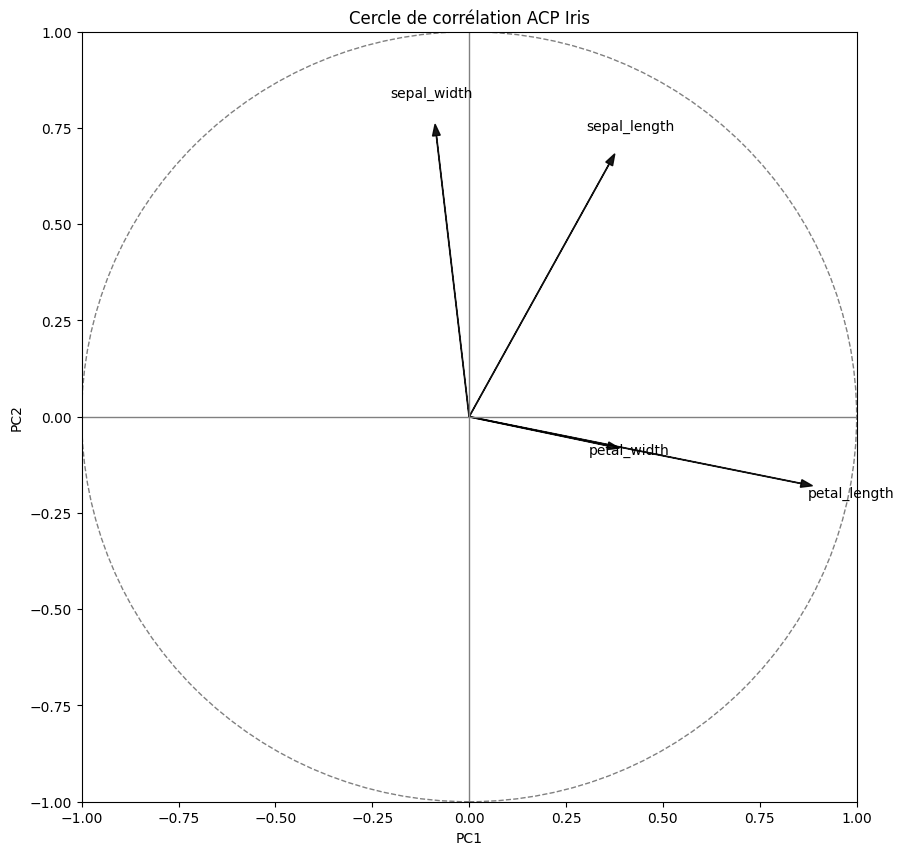

In [79]:
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP Iris')

# Afficher la figure
plt.show()

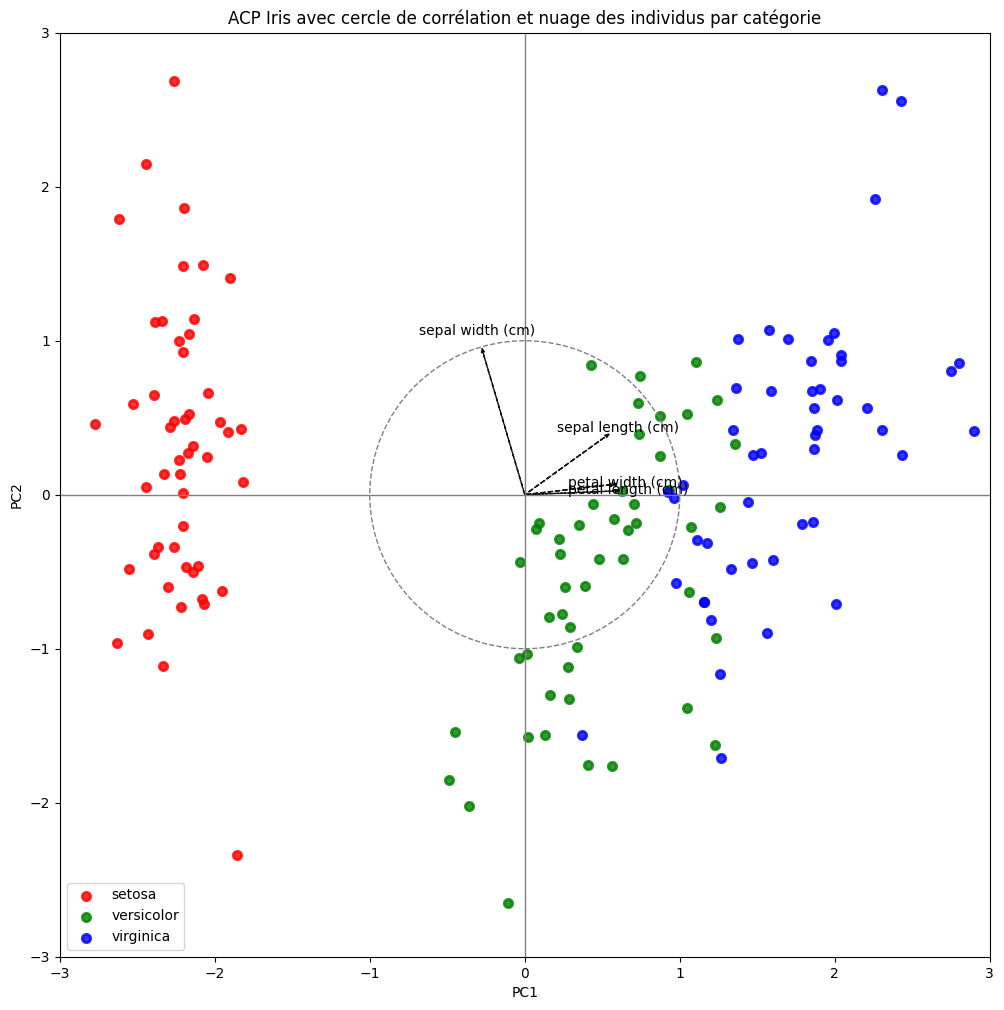

In [82]:
# Charger les données Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les catégories d'espèces avec les couleurs
colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, iris.feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP Iris avec cercle de corrélation et nuage des individus par catégorie')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()
